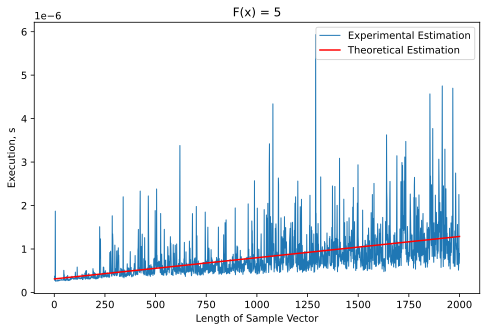

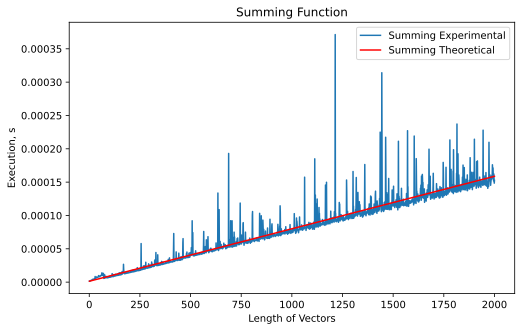

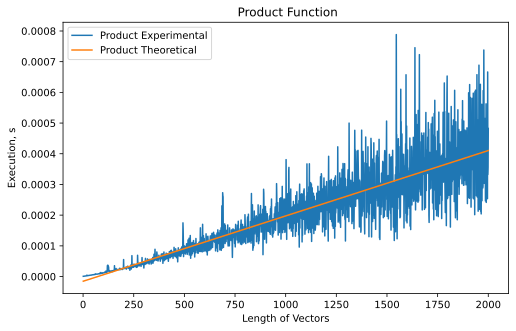

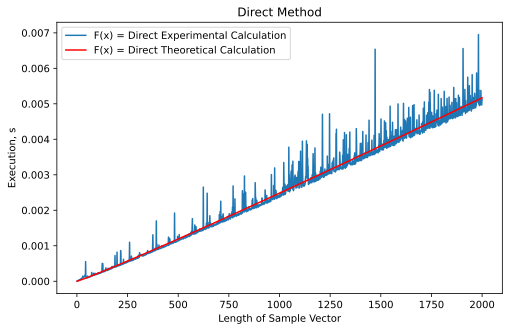

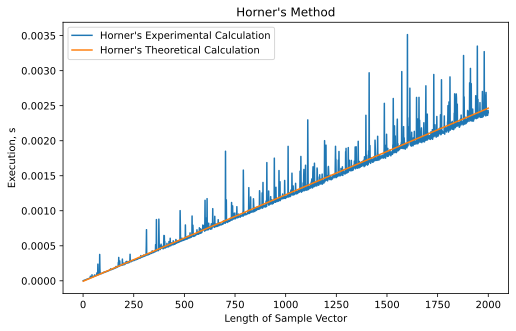

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


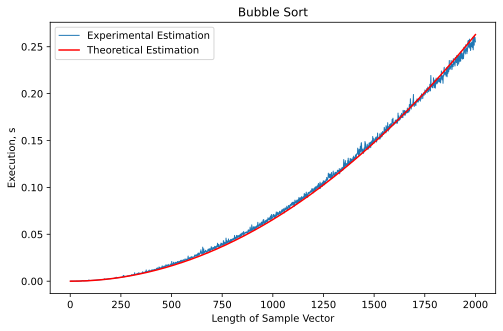

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:312: RuntimeWarning: invalid value encountered in log


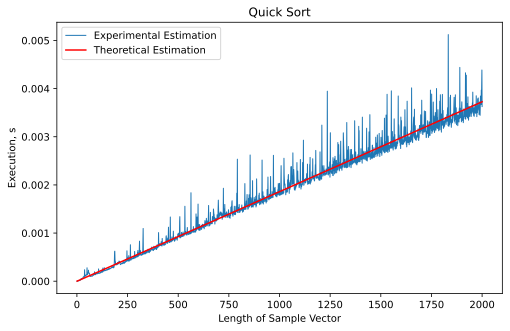

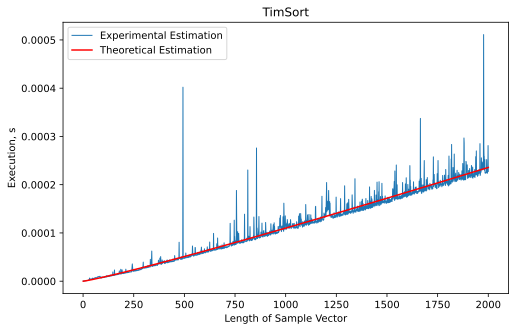

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


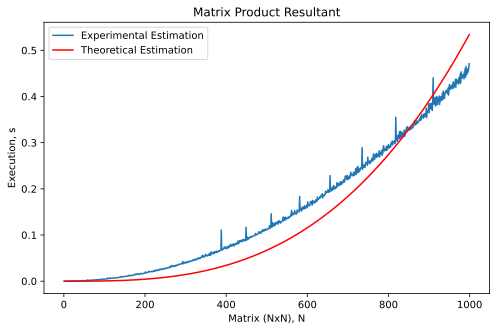

In [52]:
#-----------------------------------------------------------------------------
import time
import decimal
import math as mt
import numpy as np
import random as rn
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
rcParams['figure.figsize'] = 8, 5

#-----------------------------------------------------------------------------
#Function 1 - A Constant Function
def F1(x):
  return  5
#-----------------------------------------------------------------------------

#-----------------------------------------------------------------------------
#Function 2 - To Generate SUM of All Variables present in Array 
def F2(x):
  sum = 0
  for i in range(len(x)):
     sum += x[i]
  return sum
#-----------------------------------------------------------------------------

#-----------------------------------------------------------------------------
#Function 3 - To Generate PRODUCT of All Variables present in Array 
def F3(x):
  prod = 1
  for i in range(len(x)):
    prod *= x[i]
  return prod
#-----------------------------------------------------------------------------

#-----------------------------------------------------------------------------
#Function 4 - To Generate Polynomial Solution for P(1.5) using Direct & Horners Method
#The Direct Method

def Direct(x, v):
  DC = 0
  for i in range(len(v)):
    if i == 0:
      DC += decimal.Decimal(v[0])
    else:
      DC += decimal.Decimal(pow(decimal.Decimal(x), i))*decimal.Decimal(v[i])
  return DC
#-----------------------------------------------------------------------------

#The Horner's Method
def Horner(x, v):
  HC = 0
  array = v[::-1]
  for i in range(len(v)):
    HC *= decimal.Decimal(x)
    HC += decimal.Decimal(array[i])
  return HC
#-----------------------------------------------------------------------------

#-----------------------------------------------------------------------------
#FUNCTION 5 - Bubble Sort 
def BubbleSort(x):
  arr = x.copy()
  for i in range(len(arr)-1):
    for j in range(i, len(arr)):
      if arr[i] > arr[j]:
        arr[i], arr[j] = arr[j], arr[i]
  return arr
#-----------------------------------------------------------------------------

#-----------------------------------------------------------------------------
#FUNCTION 6 - Quick Sort

def QuickSort(x):
  Qarr = x.copy()
  if len(Qarr) > 1:
    low = []
    equal = []
    high = []
    pivot = Qarr[0]
    for i in Qarr:
      if i<pivot:
        low.append(i)
      elif i==pivot:
        equal.append(i)
      else:
        high.append(i)
    return QuickSort(low) + equal + QuickSort(high)
  else:
    return Qarr
#-----------------------------------------------------------------------------

#Generation of Sample
def Vector(n):
  ans = []
  for i in range(n):
    element = rn.randrange(0, 1000)
    ans.append(element)
  return ans

#Removing Extra Data from Sample
def SWP(array, w):
  swp_array = []
  for i in range(len(array)):
    if i < w//2 or (i >= len(array) - w//2):
      swp_array.append(array[i])
    else:
      element = array[i]
      for k in range(w//2):
        element += array[i+k]
        element += array[i-k]
      element /= w
      swp_array.append(element)
  return swp_array

#-----------------------------------------------------------------------------

#-----------------------------------------------------------------------------

avg_times = []
N = range(1, 2001)
for i in N:
  avg_time = 0
  for times in range(6):
    vec = Vector(i)
    start = time.perf_counter()
    
    F1(vec)

    end = time.perf_counter()
    if (times!=0):
      avg_time += (end - start)
  avg_time /= 5
  avg_times.append(avg_time)

Ar = np.vstack([N, np.ones(len(N))]).T
m, c = np.linalg.lstsq(Ar, avg_times, rcond=None)[0]

plt.plot(N, avg_times, label = 'Experimental Estimation', linewidth=1)
plt.plot(N, m*N + c, 'r', label='Theoretical Estimation')
plt.ylabel('Execution, s')
plt.xlabel('Length of Sample Vector')
plt.title("F(x) = 5")
plt.legend()
plt.show()
#-----------------------------------------------------------------------------

avg_times = []
avg_times2 = []
N = range(1, 2001)
for i in N:
  avg_time = 0
  for times in range(6):
    vec = Vector(i)

    start = time.perf_counter()
    F2(vec)
    end = time.perf_counter()
    if (times!=0):
      avg_time += (end - start)
  avg_time /= 5
  avg_times.append(avg_time)

for i in N:
  avg_time = 0
  for times in range(6):
    vec = Vector(i)

    start = time.perf_counter()
    F3(vec)
    end = time.perf_counter()
    if (times!=0):
      avg_time += (end - start)
  avg_time /= 5
  avg_times2.append(avg_time)

Ar = np.vstack([N, np.ones(len(N))]).T
m, c = np.linalg.lstsq(Ar, avg_times, rcond=None)[0]

Ar2 = np.vstack([N, np.ones(len(N))]).T
m2, c2 = np.linalg.lstsq(Ar2, avg_times2, rcond=None)[0]

plt.plot(N, avg_times, label = 'Summing Experimental')
plt.plot(N, m*N + c, 'r', label='Summing Theoretical')
#plt.plot(N, avg_times2, label = 'F(x) = Prod(x) Experimental')
#plt.plot(N, m2*N + c2, color = 'green', label='F(x) = Prod(x) Theoretical')
plt.ylabel('Execution, s')
plt.xlabel('Length of Vectors')
plt.title("Summing Function")
plt.legend()
plt.show()

#plt.plot(N, avg_times, label = 'F(x) = Sum(x) Experimental')
#plt.plot(N, m*N + c, 'r', label='F(x) = Sum(x) Theoretical')
plt.plot(N, avg_times2, label = 'Product Experimental')
plt.plot(N, m2*N + c2, label='Product Theoretical')
plt.ylabel('Execution, s')
plt.xlabel('Length of Vectors')
plt.title(" Product Function")
plt.legend()
plt.show()
#-----------------------------------------------------------------------------

#-----------------------------------------------------------------------------
avg_times = []
avg_times2 = []
N = range(1, 2001)
for i in N:
  avg_time = 0
  for times in range(6):
    vec = Vector(i)

    start = time.perf_counter()
    Direct(1.5, vec)
    end = time.perf_counter()
    if (times!=0):
      avg_time += (end - start)
  avg_time /= 5
  avg_times.append(avg_time)

for i in N:
  avg_time = 0
  for times in range(6):
    vec = Vector(i)
    start = time.perf_counter()
    Horner(1.5, vec)
    end = time.perf_counter()
    if (times!=0):
      avg_time += (end - start)
  avg_time /= 5
  avg_times2.append(avg_time)


def f_log(x, a, b):
  return x * a * np.log(x * b)
popt, pcov = curve_fit(f_log, N, avg_times, maxfev = 10000)

Ar = np.vstack([N, np.ones(len(N))]).T
m, c = np.linalg.lstsq(Ar, avg_times2, rcond=None)[0]

plt.plot(N, avg_times, label = r'F(x) = Direct Experimental Calculation')
plt.plot(N, f_log(N, *popt), 'r', label= r'F(x) = Direct Theoretical Calculation')
#plt.plot(N, avg_times2, label = 'F(x) = Horner\'s Experimental Calculation')
#plt.plot(N, m*N + c, color = 'green', label='F(x) Horner\'s Theoretical Calculation')
plt.ylabel('Execution, s')
plt.xlabel('Length of Sample Vector')
plt.title("Direct Method")
plt.legend()
plt.show()

#plt.plot(N, avg_times, label = r'Direct Experimental Calculation')
#plt.plot(N, f_log(N, *popt), 'r', label= r'Direct Theoretical Calculation')
plt.plot(N, avg_times2, label = 'Horner\'s Experimental Calculation')
plt.plot(N, m*N + c, label='Horner\'s Theoretical Calculation')
plt.ylabel('Execution, s')
plt.xlabel('Length of Sample Vector')
plt.title("Horner's Method")
plt.legend()
plt.show()
#-----------------------------------------------------------------------------

#Bubble Sort 
avg_times = []
N = range(1, 2001)
for i in N:
  avg_time = 0
  for times in range(6):
    vec = Vector(i)
    start = time.perf_counter()
    BubbleSort(vec)
    end = time.perf_counter()
    if (times!=0):
      avg_time += (end - start)
  avg_time /= 5
  avg_times.append(avg_time)

def f_sqr(x, a, b):
  return a * np.power(x * b, 2)
popt, pcov = curve_fit(f_sqr, N, avg_times)

plt.plot(N, avg_times, label = 'Experimental Estimation', linewidth=1)
plt.plot(N, f_sqr(N, *popt), 'r', label='Theoretical Estimation')
plt.ylabel('Execution, s')
plt.xlabel('Length of Sample Vector')
plt.title("Bubble Sort")
plt.legend()
plt.show()
#-----------------------------------------------------------------------------

#Quick Sort 
avg_times = []
N = range(1, 2001)
for i in N:
  avg_time = 0
  for times in range(6):
    vec = Vector(i)
    start = time.perf_counter()

    QuickSort(vec)

    end = time.perf_counter()
    if(times!=0):
      avg_time += (end - start)
  avg_time /= 5
  avg_times.append(avg_time)

def f_log(x, a, b):
  return x * a * np.log(x * b)
popt, pcov = curve_fit(f_log, N, avg_times, maxfev = 10000)

plt.plot(N, avg_times, label = 'Experimental Estimation', linewidth=1)
plt.plot(N, f_log(N, *popt), 'r', label='Theoretical Estimation')
plt.ylabel('Execution, s')
plt.xlabel('Length of Sample Vector')
plt.title("Quick Sort")
plt.legend()
plt.show()

#-----------------------------------------------------------------------------
#Tim Sort

avg_times = []
N = range(1, 2001)
for i in N:
  avg_time = 0
  for times in range(6):
    vec = Vector(i)
    start = time.perf_counter()
    sorted(vec)
    end = time.perf_counter()
    if (times!=0):
      avg_time += (end - start)
  avg_time /= 5
  avg_times.append(avg_time)

def f_log(x, a, b):
  return x * a * np.log(x * b)
popt, pcov = curve_fit(f_log, N, avg_times, maxfev = 10000)

plt.plot(N, avg_times, label = 'Experimental Estimation', linewidth=1)
plt.plot(N, f_log(N, *popt), 'r', label='Theoretical Estimation')
plt.ylabel('Execution, s')
plt.xlabel('Length of Sample Vector')
plt.title("TimSort")
plt.legend()
plt.show()
#-----------------------------------------------------------------------------

#-----------------------------------------------------------------------------
def MM(A, B):
  zip_b = zip(*B)
  return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b))for col_b in zip_b] for row_a in A]

# N Max Range
avg_times = []
N = range(1, 1000)
AB = []

for i in N:
  A = np.random.randint(1, 100, (i,i))
  B = np.random.randint(1, 100, (i,i))
  times = []

  for rounds in range(0, 5):
    start_time = time.perf_counter()

    AB.append(MM(A, B))

    end_time = time.perf_counter()
    times.append(end_time - start_time)

  avg_times.append(sum(times)/len(times))
  times.clear()

#-----------------------------------------------------------------------------

#-----------------------------------------------------------------------------

def FMul(x, a, b):
  return a * np.power(x * b, 3)

popt, pcov = curve_fit(FMul, N, avg_times, maxfev = 10000)

plt.plot(N, avg_times, label = 'Experimental Estimation')
plt.plot(N, FMul(N, *popt), 'r', label='Theoretical Estimation')
plt.ylabel('Execution, s')
plt.xlabel('Matrix (NxN), N')
plt.title("Matrix Product Resultant")
plt.legend()
plt.show()

#-----------------------------------------------------------------------------